# Strategy Screener

The code in this notebook and its associated python files were written with the aim to simplify quick screening of a trend-following strategy using technical analysis indicators and daily OHLCV data from Yahoo Finance. Inputs that can be customised are: bid-ask spread, fees, ticker symbol, start and end date, choice of indicators, and entry and exit rules. To mimic real-life trading, when a entry/exit signal arises, an order is executed on the following day. The strategy can finally be evaluated based on maximum drawdown, Sharpe ratio, and CAGR.

In [1]:
# import relevant libraries
import pandas as pd
import numpy as np
import datetime as dt
import yfinance as yf

### Data Preparations

In [2]:
# define bid/ask spread and the fees
spread = 0.005 #(50 basis points)
fees = 0.05 #(5% per annum)

# Specify the ticker symbol and the start and end dates
ticker = 'GDX'
start = dt.datetime.today()-dt.timedelta(730)
end = dt.datetime.today()

# Retrieve price data from Yahoo Finance
df = pd.DataFrame(yf.download(ticker,start,end))#,interval='1h'))

# calculate percentage change in the closing price
df['Percent Change'] = df['Close'].pct_change()

[*********************100%***********************]  1 of 1 completed


### Technical Analysis Indicators

In [3]:
from TA_indicators_v2_1 import *

# calculate technical analysis indicators

df['EMA'] = EMA(df,50)
df[['True Range','ATR']] = ATR(df)
df[['VI+','VI-']] = vortex(df,10)
df[['SSL Down','SSL Up']] = SSL(df,20)

#df['SuperTrend'] = SuperTrend(df,3,10)
#df[['UpperBand','LowerBand']] = bollinger(df,20)
#df['RSI'] = RSI(df,14)
#df[['MACD','MACD Signal','MACD Histogram']] = MACD(df,17,8,9)
#df['CMF'] = CMF(df,8)
#df['CHOP'] = CHOP(df,8)

### Entry & Exit Rules

In [4]:
# define the entry & exit signals for long trades
long_entry_signal = (df['Close'] > df['EMA']) & (df['VI+'] > 1) & (df['SSL Up'] > df['SSL Down'])
long_exit_signal = (df['SSL Up'] < df['SSL Down'])

# define the entry & exit signals for short trades
short_entry_signal = (df['Close'] < df['EMA']) & (df['VI-'] > 1) & (df['SSL Down'] > df['SSL Up'])
short_exit_signal = (df['SSL Down'] < df['SSL Up'])

### Strategy KPI Calculations & Equity Curve Visualisation

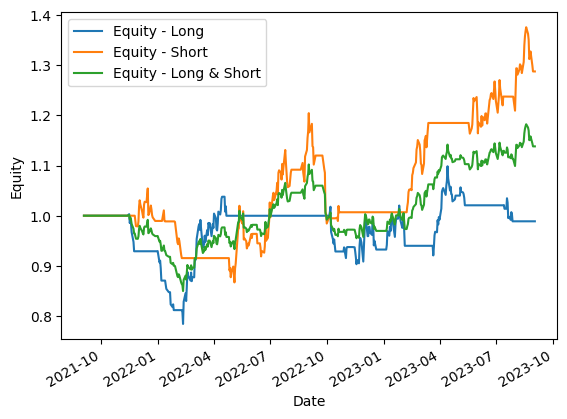

In [5]:
from long_short_screen_v1_2 import *

# calculate strategy KPI's & visualise equity curves (taking into account the bid/ask spread and fees)

maxDD, maxDDDuration, DDDay, sharpeRatio, cagr = long_short_screen(df, long_entry_signal, long_exit_signal,
                                                    short_entry_signal, short_exit_signal, spread, fees)

### Strategy KPI's

In [6]:
print(f'Maximum drawdown: {round(maxDD*100,2)} %')
print(f'Maximum drawdown duration: {maxDDDuration} days')
print(f'Bottom of drawdown occurred on: {DDDay}')
print(f'Sharpe ratio: {round(sharpeRatio,3)}')
print(f'Compounded annual growth rate: {round(cagr*100,2)} %')

Maximum drawdown: -7.58 %
Maximum drawdown duration: 146.0 days
Bottom of drawdown occurred on: 2022-02-10
Sharpe ratio: 0.402
Compounded annual growth rate: 6.72 %
